In [2]:
source('helpers.R')
source('../utils.R')

loadLibraries()
x = loadData()

In [40]:
df.combined =  x$combined %>% 
    mutate(MSSubClass = as.character(MSSubClass), 
           YearBuiltChar = as.character(YearBuilt),
           LotAreaSqrt = sqrt(LotArea),
           LotAreaLog = log(LotFrontage),
           LotShape2=ifelse(LotShape == 'Reg', 'Reg', 'Ireg')
    )

df.lot_frontage = df.combined %>% filter(!is.na(LotFrontage))
df.lot_frontage.na = df.combined %>% filter(is.na(LotFrontage))
df.lot_frontage.cutted = df.lot_frontage %>% filter(LotFrontage < 130)

df.train = df.combined %>% filter(dataSource == "train") %>% mutate(LotFrontageCalc = NA)


getByNeighborhood = function (neigh) {
    df.lot_frontage %>% filter(Neighborhood == neigh)    
}

getTrainData =  function () {
    df.combined %>% filter(dataSource == "train") %>% mutate(LotFrontageCalc = NA)
}

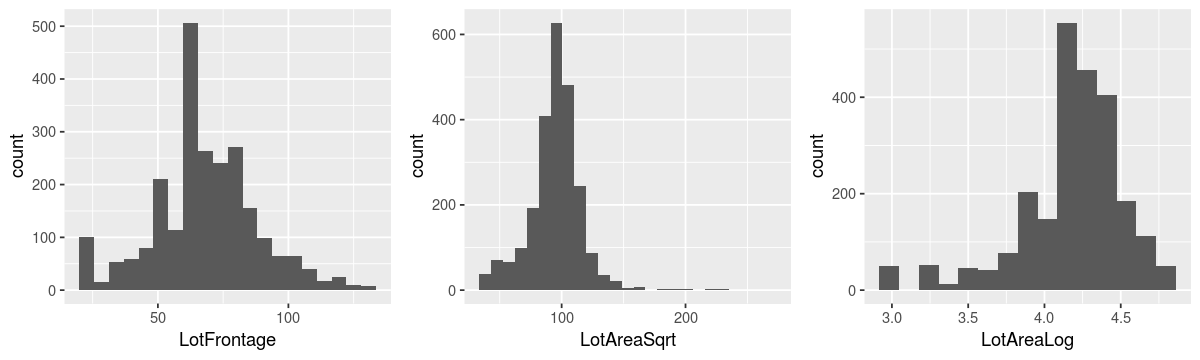

In [6]:
options(repr.plot.width = 10, repr.plot.height = 3)

g1 = ggplot(df.lot_frontage.cutted, aes(x = LotFrontage)) + geom_histogram(bins = 20)
g2 = ggplot(df.lot_frontage.cutted, aes(x = LotAreaSqrt)) + geom_histogram(bins = 25)
g3 = ggplot(df.lot_frontage.cutted, aes(x = LotAreaLog)) + geom_histogram(bins = 15)

grid.arrange(g1, g2, g3, layout_matrix=rbind(c(1, 2, 3)))

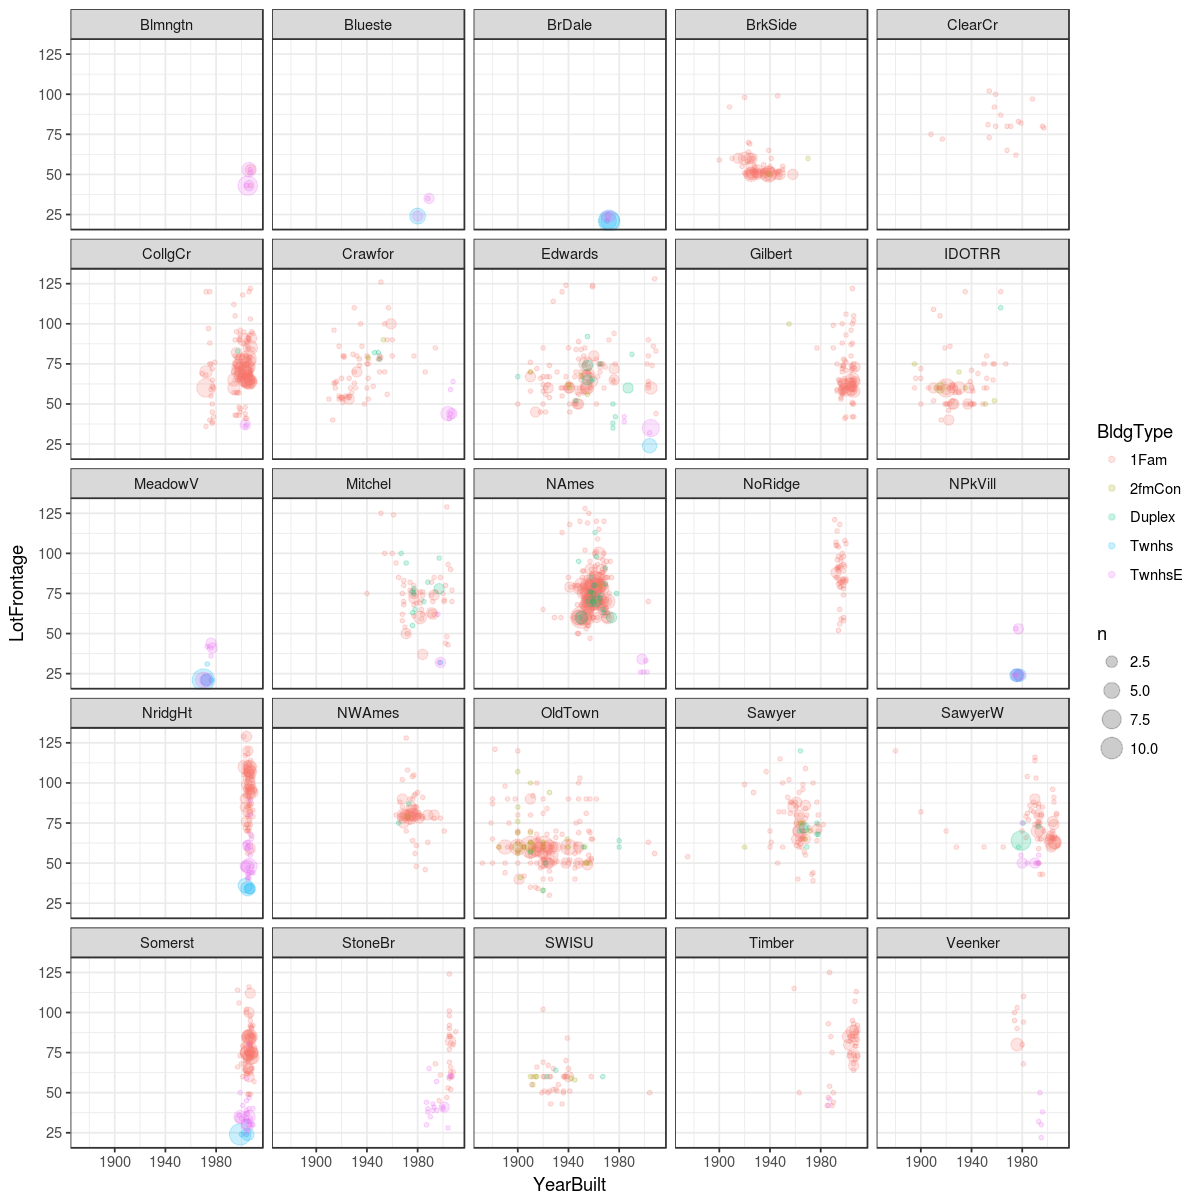

In [7]:
options(repr.plot.width = 10, repr.plot.height = 10)

ggplot(df.lot_frontage.cutted, aes(x=YearBuilt, y=LotFrontage)) +
    geom_count(aes(colour = BldgType), alpha=0.2) +
    facet_wrap(~Neighborhood) +
    theme_bw()

# Blmngtn

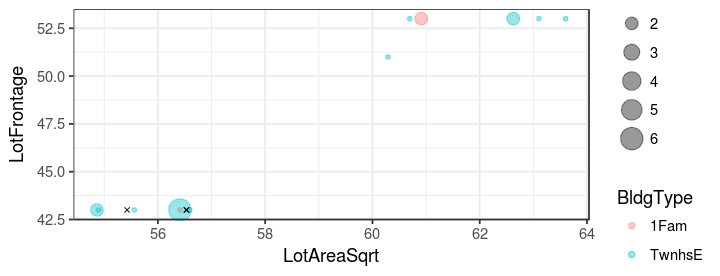

In [34]:
options(repr.plot.width = 6, repr.plot.height = 2.3)

source("lot_frontage_fix_na.R")

df.train = getTrainData()
df.train = FixNaLotFrontage.Blmngtn(df.train)

ggplot() +
    geom_count(data = df.lot_frontage %>% 
                      filter(Neighborhood == 'Blmngtn'), 
               aes(x=LotAreaSqrt, y=LotFrontage, colour=BldgType), 
               alpha=0.4) +
    geom_point(data = df.train %>% 
                       filter(Neighborhood == 'Blmngtn') %>% 
                       filter(is.na(LotFrontage)),
               aes(x=LotAreaSqrt, y=LotFrontageCalc),
               alpha=0.8, shape=4, size=1) +
    theme_bw()

# Blueste

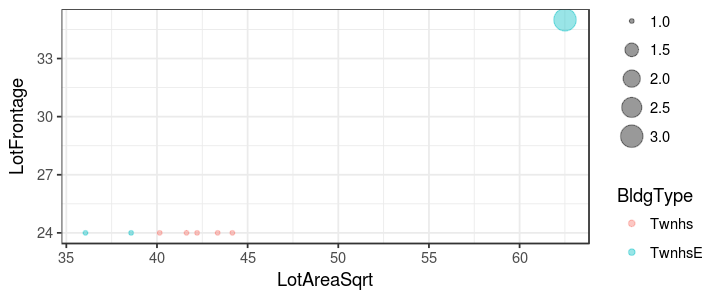

In [24]:
options(repr.plot.width = 6, repr.plot.height = 2.5)

ggplot(df.lot_frontage %>% filter(Neighborhood == 'Blueste'), aes(x=LotAreaSqrt, y=LotFrontage)) +
    geom_count(aes(colour = BldgType), alpha=0.4) +
    theme_bw()

# BrDale

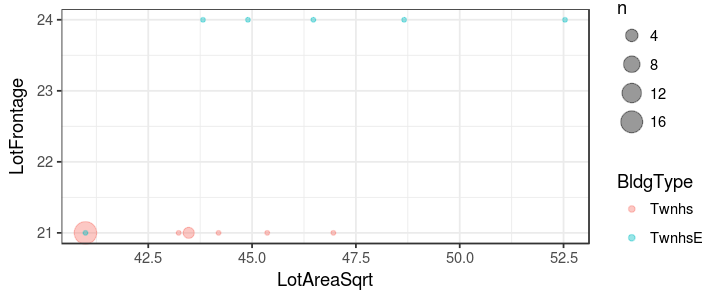

In [16]:
options(repr.plot.width = 6, repr.plot.height = 2.5)

ggplot(df.lot_frontage %>% filter(Neighborhood == 'BrDale'), aes(x=LotAreaSqrt, y=LotFrontage)) +
    geom_count(aes(colour = BldgType), alpha=0.4) +
    theme_bw()

# BrkSide

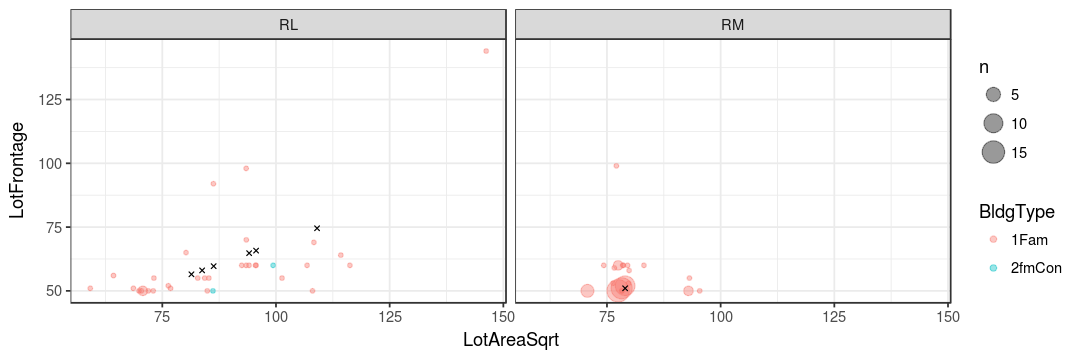

In [37]:
options(repr.plot.width = 9, repr.plot.height = 3)

source("lot_frontage_fix_na.R")

df.train = getTrainData()
df.BrkSide = getByNeighborhood('BrkSide')

df.train = FixNaLotFrontage.BrkSide(df.train, df.BrkSide)

ggplot() +
    geom_count(data=df.BrkSide, 
               aes(x=LotAreaSqrt, y=LotFrontage, colour=BldgType), 
               alpha=0.4) +
    geom_point(data=df.train %>% filter(Neighborhood == 'BrkSide') %>% filter(is.na(LotFrontage)),
               aes(x=LotAreaSqrt, y=LotFrontageCalc),
               alpha=1, shape=4, size=1) +
     facet_wrap(~MSZoning) +
     theme_bw()

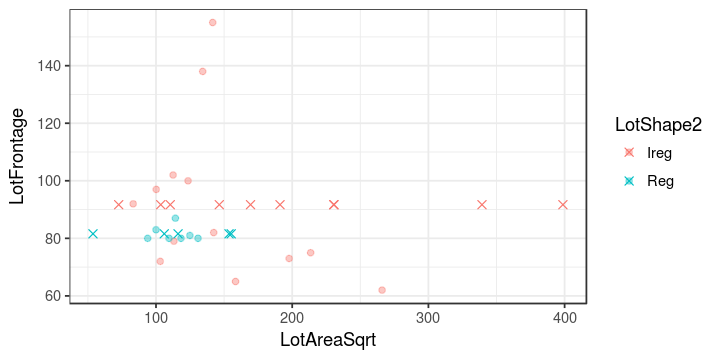

In [38]:
options(repr.plot.width = 6, repr.plot.height = 3)

source("lot_frontage_fix_na.R")

df.train = getTrainData()
df.ClearCr = getByNeighborhood('ClearCr')

df.train = FixNaLotFrontage.ClearCr(df.train, df.ClearCr)

ggplot() +
    geom_point(data = df.ClearCr, 
               aes(x=LotAreaSqrt, y=LotFrontage, colour=LotShape2), 
               alpha=0.4) +
    geom_point(data = df.train %>% 
                       filter(Neighborhood == 'ClearCr') %>% 
                       filter(is.na(LotFrontage)),
               aes(x=LotAreaSqrt, y=LotFrontageCalc, colour=LotShape2),
               alpha=1, shape=4, size=2) +
    theme_bw()

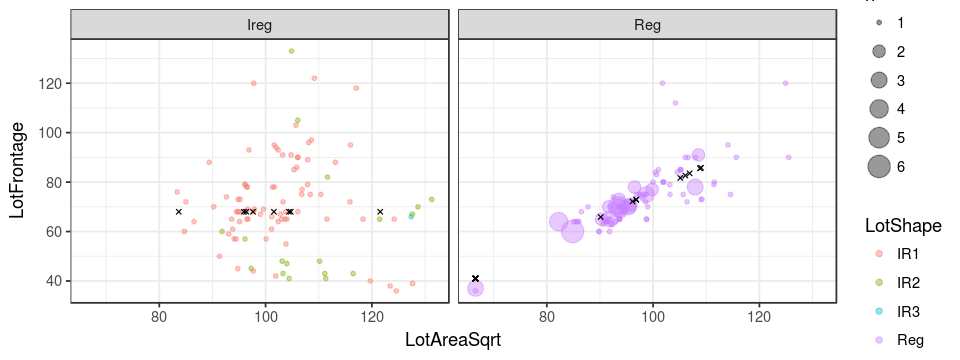

In [39]:
options(repr.plot.width = 8, repr.plot.height = 3)

source("lot_frontage_fix_na.R")

df.train = getTrainData()
df.CollgCr = getByNeighborhood('CollgCr')

df.train = FixNaLotFrontage.CollgCr(df.train, df.CollgCr)

ggplot() +
    geom_count(data=df.CollgCr, 
               aes(x=LotAreaSqrt, y=LotFrontage, colour=LotShape), 
               alpha=0.4) +
    geom_point(data=df.train %>% filter(Neighborhood == 'CollgCr') %>% filter(is.na(LotFrontage)),
               aes(x=LotAreaSqrt, y=LotFrontageCalc),
               alpha=1, shape=4, size=1) +
    facet_wrap(~LotShape2) +
    theme_bw()

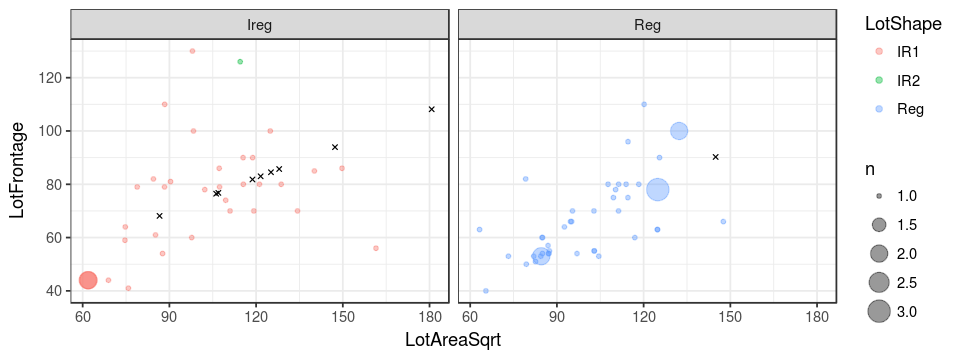

In [27]:
options(repr.plot.width = 8, repr.plot.height = 3)

source("lot_frontage_fix_na.R")

df.train = df.combined %>% filter(dataSource == "train") %>% mutate(LotFrontageCalc = NA)
df.Crawfor = df.lot_frontage %>% filter(Neighborhood == 'Crawfor') 

df.train = FixNaLotFrontage.Crawfor(
        df.train = df.train, 
        df.data = df.Crawfor
)

ggplot() +
    geom_count(data=df.Crawfor, 
               aes(x=LotAreaSqrt, y=LotFrontage, colour=LotShape), 
               alpha=0.4) +
    geom_point(data=df.train %>% filter(Neighborhood == 'Crawfor') %>% filter(is.na(LotFrontage)),
               aes(x=LotAreaSqrt, y=LotFrontageCalc),
               alpha=1, shape=4, size=1) +
     facet_wrap(~LotShape2) +
     theme_bw()

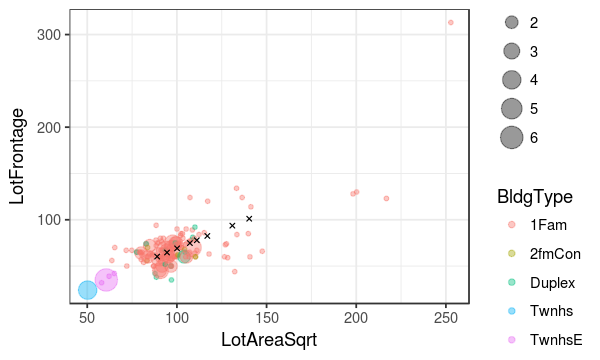

In [28]:
options(repr.plot.width = 5, repr.plot.height = 3)

source("lot_frontage_fix_na.R")

df.train = df.combined %>% filter(dataSource == "train") %>% mutate(LotFrontageCalc = NA)
df.Edwards = df.lot_frontage %>% filter(Neighborhood == 'Edwards')

df.train = FixNaLotFrontage.Edwards(df.train, df.Edwards)

ggplot() +
    geom_count(data=df.data.Edwards, 
               aes(x=LotAreaSqrt, y=LotFrontage, colour=BldgType), 
               alpha=0.4) +
    geom_point(data=df.train %>% filter(Neighborhood == 'Edwards') %>% filter(is.na(LotFrontage)),
               aes(x=LotAreaSqrt, y=LotFrontageCalc),
               alpha=1, shape=4, size=1) +
    theme_bw()

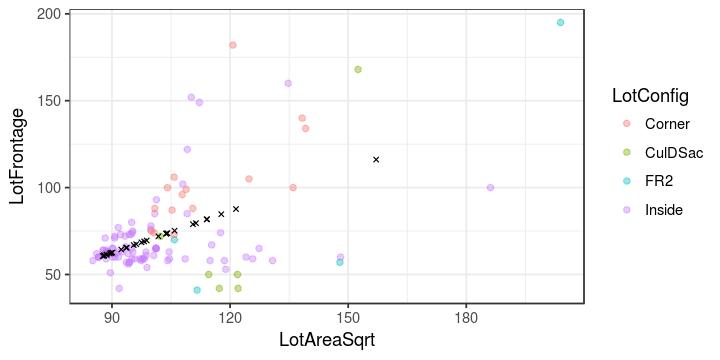

In [29]:
options(repr.plot.width = 6, repr.plot.height = 3)

source("lot_frontage_fix_na.R")

df.data.Gilbert = df.lot_frontage %>% filter(Neighborhood == 'Gilbert')

df.train = df.combined %>% filter(dataSource == "train") %>% mutate(LotFrontageCalc = NA)
df.train = FixNaLotFrontage.Gilbert(
        df.train = df.train, 
        df.data = df.data.Gilbert
)

ggplot() +
    geom_point(data=df.data.Gilbert, 
               aes(x=LotAreaSqrt, y=LotFrontage, colour=LotConfig), 
               alpha=0.4) +
    geom_point(data=df.train %>% filter(Neighborhood == 'Gilbert') %>% filter(is.na(LotFrontage)),
               aes(x=LotAreaSqrt, y=LotFrontageCalc),
               alpha=1, shape=4, size=1) +
    theme_bw()

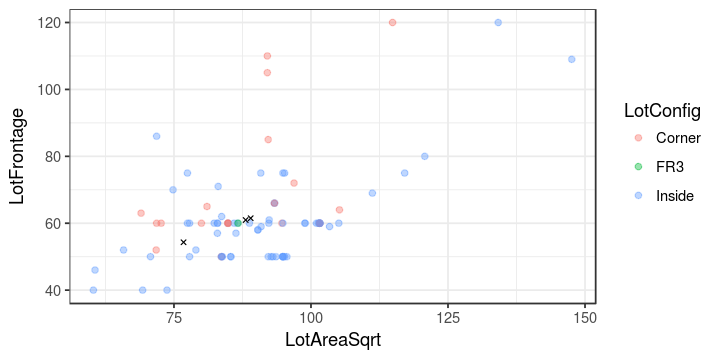

In [30]:
options(repr.plot.width = 6, repr.plot.height = 3)

source("lot_frontage_fix_na.R")

df.data.IDOTRR = df.lot_frontage %>% filter(Neighborhood == 'IDOTRR')

df.train = df.combined %>% filter(dataSource == "train") %>% mutate(LotFrontageCalc = NA)
df.train = FixNaLotFrontage.IDOTRR(
        df.train = df.train, 
        df.data = df.data.IDOTRR
)

ggplot() +
    geom_point(data=df.data.IDOTRR, 
               aes(x=LotAreaSqrt, y=LotFrontage, colour=LotConfig), 
               alpha=0.4) +
    geom_point(data=df.train %>% filter(Neighborhood == 'IDOTRR') %>% filter(is.na(LotFrontage)),
               aes(x=LotAreaSqrt, y=LotFrontageCalc),
               alpha=1, shape=4, size=1) +
    theme_bw()

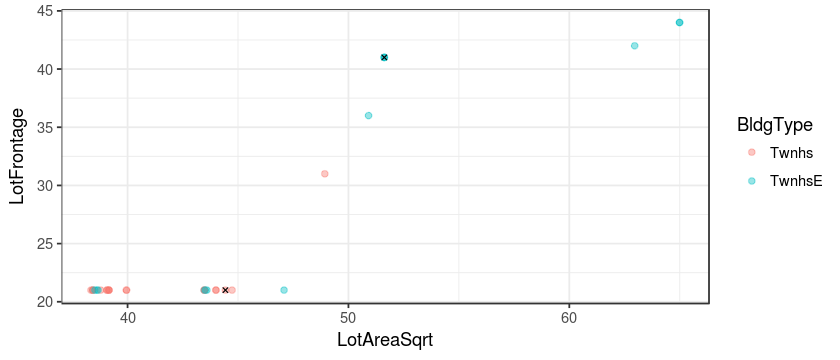

In [61]:
options(repr.plot.width = 7, repr.plot.height = 3)

source("lot_frontage_fix_na.R")

df.data.MeadowV = df.lot_frontage %>% filter(Neighborhood == 'MeadowV')
df.train = df.combined %>% filter(dataSource == "train") %>% mutate(LotFrontageCalc = NA)

df.train = FixNaLotFrontage.MeadowV(df.train = df.train)

ggplot() +
    geom_point(data=df.data.MeadowV, 
               aes(x=LotAreaSqrt, y=LotFrontage, colour=BldgType), 
               alpha=0.4) +
    geom_point(data=df.train %>% filter(Neighborhood == 'MeadowV') %>% filter(is.na(LotFrontage)),
               aes(x=LotAreaSqrt, y=LotFrontageCalc),
               alpha=1, shape=4, size=1) +
    theme_bw()

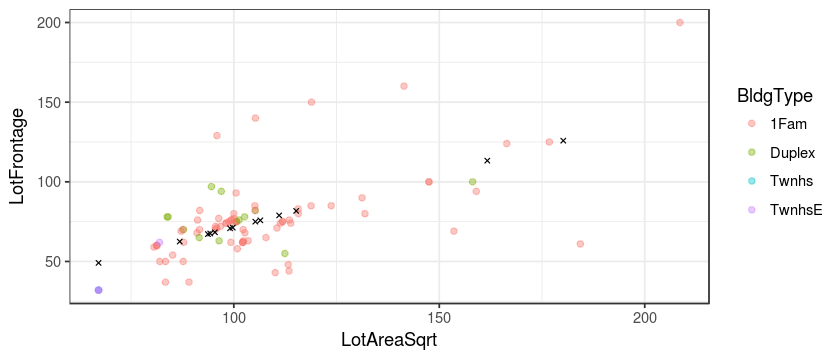

In [41]:
options(repr.plot.width = 7, repr.plot.height = 3)

source("lot_frontage_fix_na.R")

df.train = getTrainData()
df.Mitchel = getByNeighborhood('Mitchel')

df.train = FixNaLotFrontage.Mitchel(df.train, df.Mitchel)

ggplot() +
    geom_point(data=df.Mitchel, 
               aes(x=LotAreaSqrt, y=LotFrontage, colour=BldgType), 
               alpha=0.4) +
    geom_point(data=df.train %>% filter(Neighborhood == 'Mitchel') %>% filter(is.na(LotFrontage)),
               aes(x=LotAreaSqrt, y=LotFrontageCalc),
               alpha=1, shape=4, size=1) +
    theme_bw()

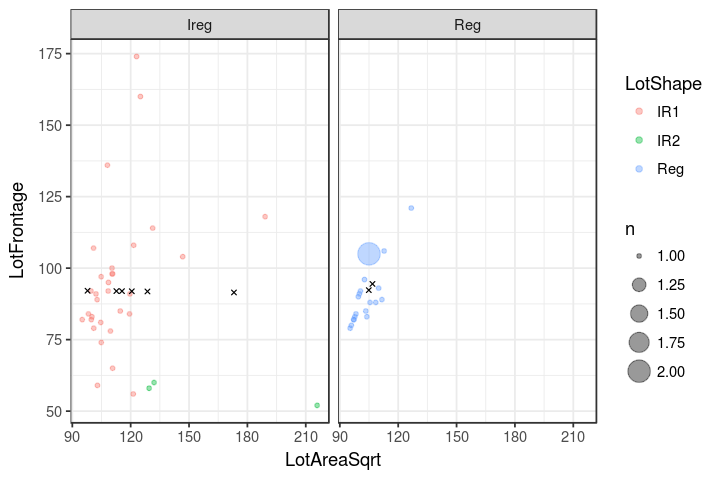

In [46]:
options(repr.plot.width = 6, repr.plot.height = 4)

source("lot_frontage_fix_na.R")

df.train = getTrainData()
df.NoRidge = getByNeighborhood('NoRidge')

df.train = FixNaLotFrontage.NoRidge(df.train, df.NoRidge)

ggplot() +
    geom_count(data=df.NoRidge, 
               aes(x=LotAreaSqrt, y=LotFrontage, colour=LotShape), 
               alpha=0.4) +
    geom_point(data=df.train %>% filter(Neighborhood == 'NoRidge') %>% filter(is.na(LotFrontage)),
               aes(x=LotAreaSqrt, y=LotFrontageCalc),
               alpha=1, shape=4, size=1) +
     facet_wrap(~LotShape2) +
     theme_bw()

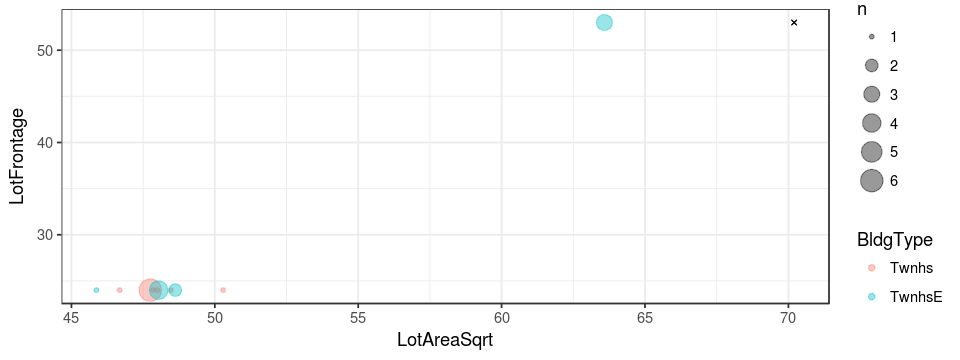

In [52]:
options(repr.plot.width = 8, repr.plot.height = 3)

source("lot_frontage_fix_na.R")

df.train = getTrainData()
df.nei = getByNeighborhood('NPkVill')

df.train = FixNaLotFrontage.NPkVill(df.train)

ggplot() +
    geom_count(data = df.nei, 
               aes(x=LotAreaSqrt, y=LotFrontage, colour=BldgType), 
               alpha=0.4) +
    geom_point(data = df.train %>% 
                      filter(Neighborhood == 'NPkVill') %>% 
                      filter(is.na(LotFrontage)),
               aes(x=LotAreaSqrt, y=LotFrontageCalc),
               alpha=0.8, shape=4, size=1) +
    theme_bw()

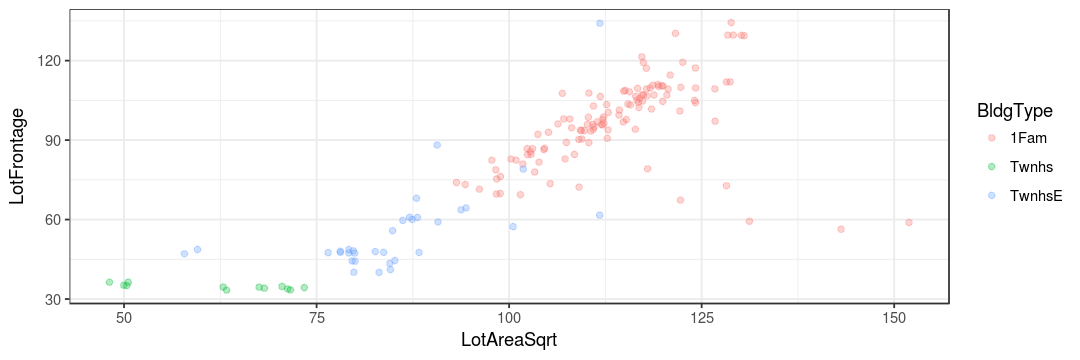

In [61]:
options(repr.plot.width = 9, repr.plot.height = 3)

ggplot(df.lot_frontage %>% filter(Neighborhood == 'NridgHt'), aes(x=LotAreaSqrt, y=LotFrontage)) +
    geom_jitter(aes(colour = BldgType), alpha=0.3, width=1, height=1) +
    #facet_wrap(~BldgType) +
    theme_bw()

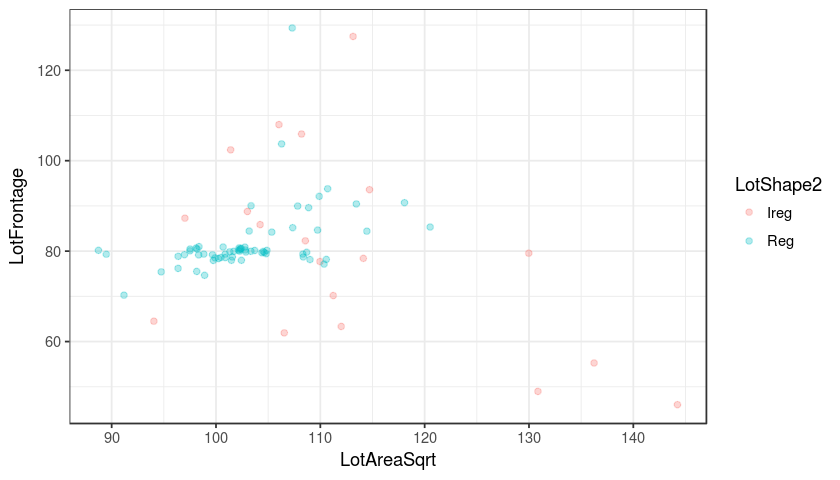

In [53]:
options(repr.plot.width = 7, repr.plot.height = 4)

ggplot(df.lot_frontage %>% filter(Neighborhood == 'NWAmes'), aes(x=LotAreaSqrt, y=LotFrontage)) +
    geom_jitter(aes(colour = LotShape2), alpha=0.3, width=1, height=1) +
    theme_bw()

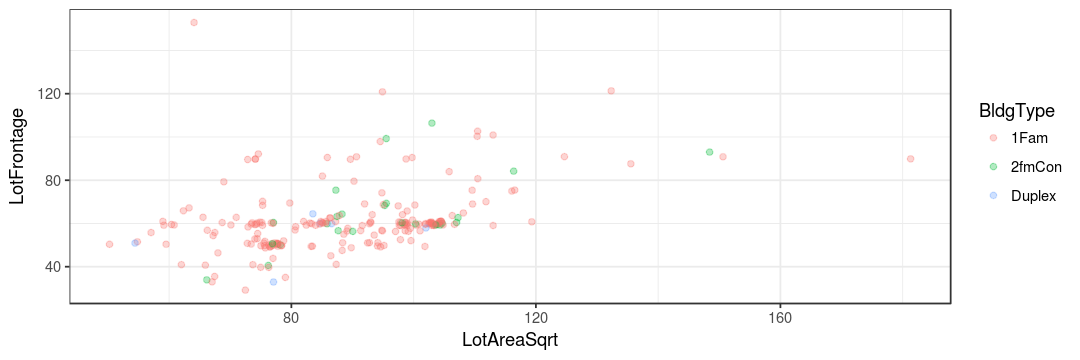

In [56]:
options(repr.plot.width = 9, repr.plot.height = 3)

ggplot(df.lot_frontage %>% filter(Neighborhood == 'OldTown'), aes(x=LotAreaSqrt, y=LotFrontage)) +
    geom_jitter(aes(colour = BldgType), alpha=0.3, width=1, height=1) +
    theme_bw()

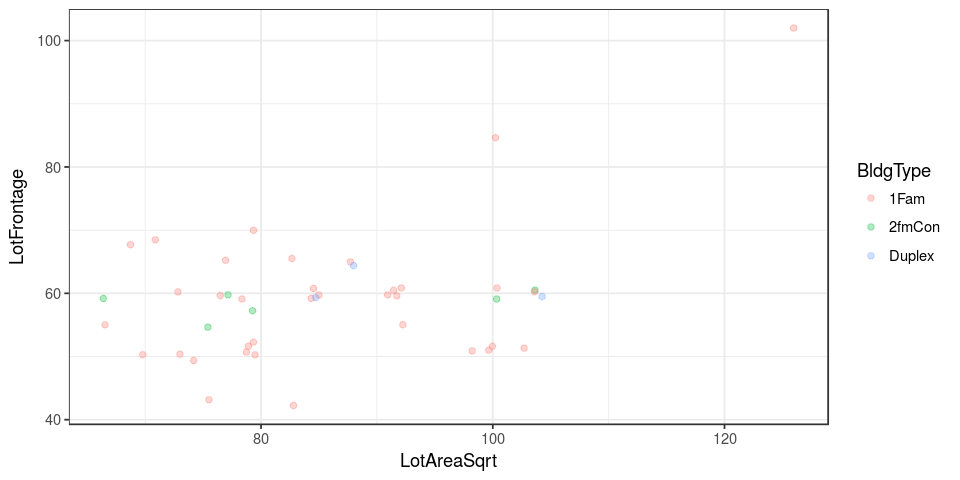

In [287]:
options(repr.plot.width = 8, repr.plot.height = 4)

ggplot(df.lot_frontage %>% filter(Neighborhood == 'SWISU'), aes(x=LotAreaSqrt, y=LotFrontage)) +
    geom_jitter(aes(colour = BldgType), alpha=0.3, width=1, height=1) +
    theme_bw()

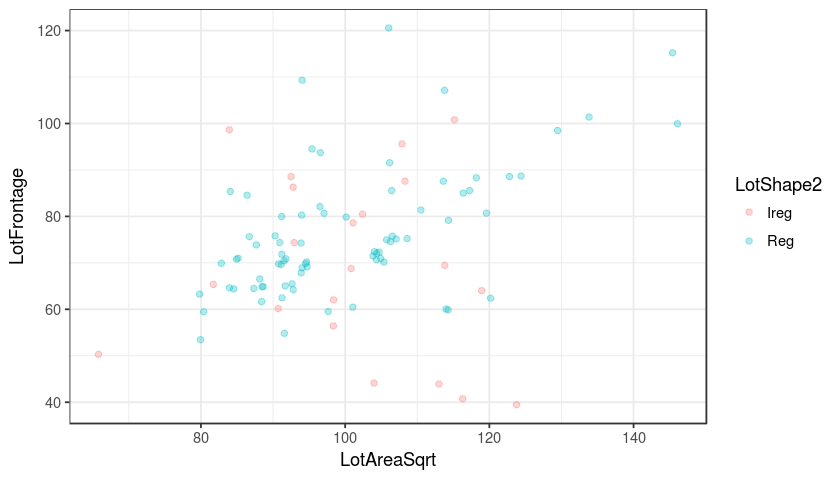

In [57]:
options(repr.plot.width = 7, repr.plot.height = 4)

ggplot(df.lot_frontage %>% filter(Neighborhood == 'Sawyer'), aes(x=LotAreaSqrt, y=LotFrontage)) +
    geom_jitter(aes(colour = LotShape2), alpha=0.3, width=1, height=1) +
    theme_bw()

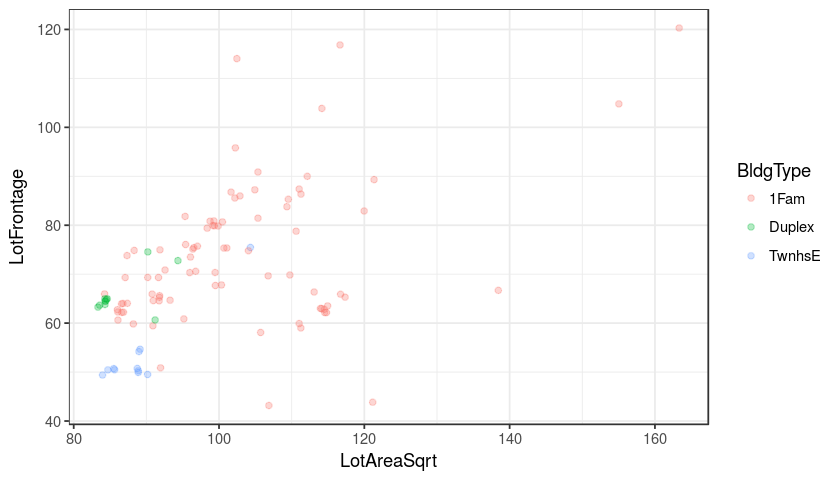

In [304]:
options(repr.plot.width = 7, repr.plot.height = 4)

ggplot(df.lot_frontage %>% filter(Neighborhood == 'SawyerW'), aes(x=LotAreaSqrt, y=LotFrontage)) +
    geom_jitter(aes(colour = BldgType), alpha=0.3, width=1, height=1) +
    theme_bw()

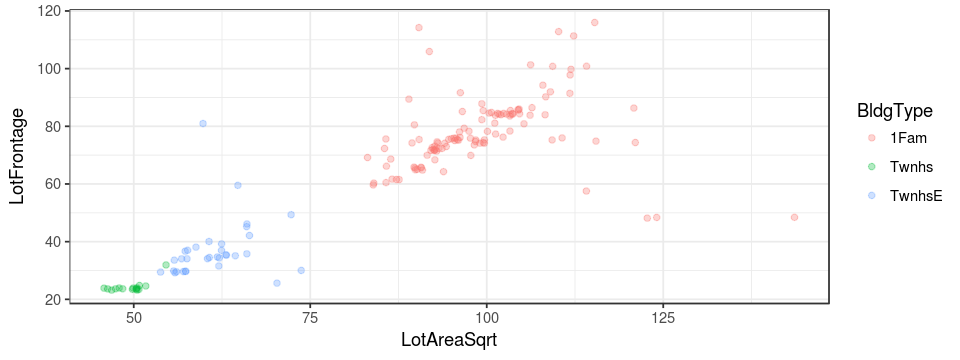

In [59]:
options(repr.plot.width = 8, repr.plot.height = 3)

ggplot(df.lot_frontage %>% filter(Neighborhood == 'Somerst'), aes(x=LotAreaSqrt, y=LotFrontage)) +
    geom_jitter(aes(colour = BldgType), alpha=0.3, width=1, height=1) +
    #facet_wrap(~BldgType) +
    theme_bw()

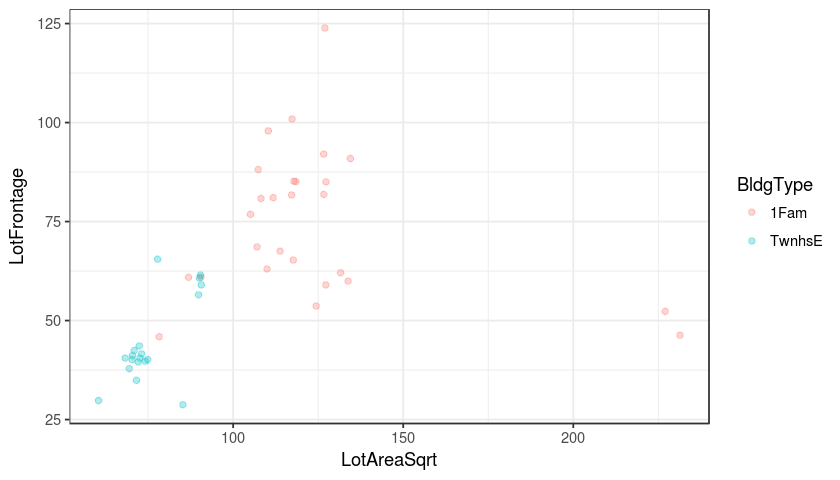

In [62]:
options(repr.plot.width = 7, repr.plot.height = 4)

ggplot(df.lot_frontage %>% filter(Neighborhood == 'StoneBr'), aes(x=LotAreaSqrt, y=LotFrontage)) +
    geom_jitter(aes(colour = BldgType), alpha=0.3, width=1, height=1) +
    theme_bw()

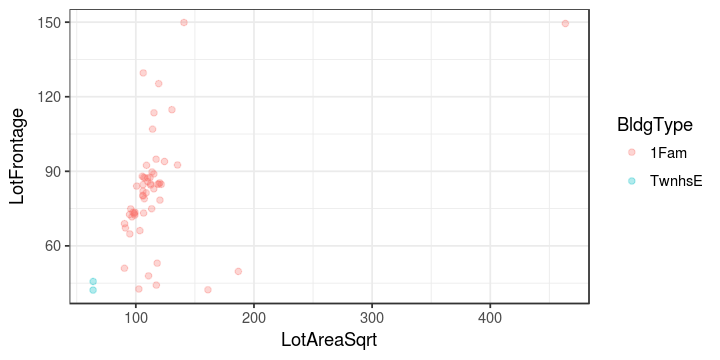

In [63]:
options(repr.plot.width = 6, repr.plot.height = 3)

ggplot(df.lot_frontage %>% filter(Neighborhood == 'Timber'), aes(x=LotAreaSqrt, y=LotFrontage)) +
    geom_jitter(aes(colour = BldgType), alpha=0.3, width=1, height=1) +
    theme_bw()

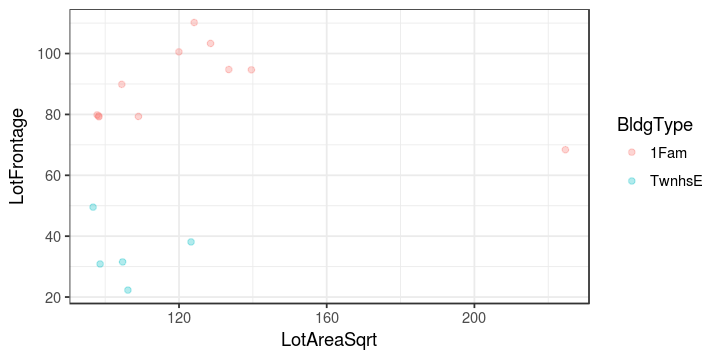

In [64]:
options(repr.plot.width = 6, repr.plot.height = 3)

ggplot(df.lot_frontage %>% filter(Neighborhood == 'Veenker'), aes(x=LotAreaSqrt, y=LotFrontage)) +
    geom_jitter(aes(colour = BldgType), alpha=0.3, width=1, height=1) +
    theme_bw()